# Ejemplo 1: Calcular el área de servicio para definir <br> ubicación del próximo restaurante

<img src="logo_startup.png">

Un grupo de jóvenes emprendedores está interesado en abrir un nuevo startup de videojuegos y realidad aumentada llamado **XYZ** en la ciudad de Bogotá. Después de un estudio de mercadeo, el grupo identifico 1132 clientes potenciales distribuidos alrededor de la ciudad. Adicionalmente, encontraron que este tipo de negocio tiene el mayor impacto en una distancia de manejo de máximo tres kilómetros. 

Teniendo en cuenta esto, el grupo encontró tres predios potenciales para la ubicación de su local. Con el fin de escoger el predio van a calcular un área de servicio teniendo en cuenta la distancia de manejo, permitiendoles un mayor número de clientes potenciales.<br>

<hr>
### Ingresar a la cuenta de ArcGIS Online y crear mapa


En primer lugar importamos el API de ArcGIS y el paquete `time`.

In [1]:
from arcgis import *
from IPython.display import display
import time

gis = GIS(username='rmartin_geek')

Enter password: ········


Ahora generamos un mapa centrado en Bogotá.

In [2]:
map1 = gis.map('Bogota, Colombia')
map1.basemap = 'dark-gray-vector'
map1

MapView(layout=Layout(height='400px', width='100%'))


### Acceso a capas y visualización

Ahora vamos a acceder a la capa de clientes potenciales accediendo a un servicio rest tomando como la url como parámetro para la creación de un objeto `FeatureLayer`. Adicionalmente agregamos la capa al mapa utilizando el método `add_layer()`.

In [3]:
clientes = features.FeatureLayer(url='https://services.arcgis.com/8DAUcrpQcpyLMznu/ArcGIS/rest/services/Clientes_Bogota/FeatureServer/0')
map1.add_layer(clientes)

Otra manera de acceder a una capa es buscandola en ArcGIS Online, bien sea dentro de la organización o por fuera de esta. En este caso vamos a buscar el contenido dentro de la organización que tenga la palabra clave y vamos a mostrar los resultados utilizando la función `display()` del paquete `IPython`.

<Item title:"Mexico Retirement Planning Map" type:Web Map owner:CindyFowler>
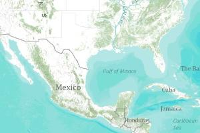

<Item title:"Tiendas y fábricas de inditex" type:Web Mapping Application owner:mariasancho>
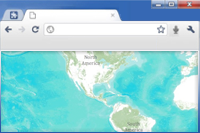

<Item title:"Tiendas y fábricas de Inditex" type:Web Mapping Application owner:claudialamo>
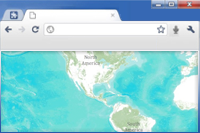

<Item title:"MAPA OMA" type:Web Map owner:lvsarmientoc_UDFJC>
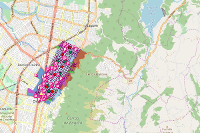

<Item title:"Tiendas Zara - Map Journal" type:Web Mapping Application owner:pgangwani>
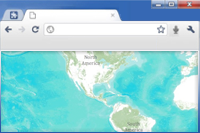

<Item title:"Casetas de Jardín 24" type:Web Map owner:casetasdejardin>
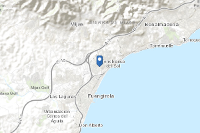

<Item title:"462 Comercio al por menor en tiendas de autoservicio y departamentales" type:Web Mapping Application owner:atlas.xalapa2018>
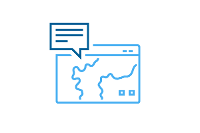

<Item title:"Tiendas y fábricas de Inditex" type:Web Mapping Application owner:teresagrevilla>
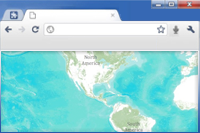

<Item title:"Restaurantes y tiendas Slow Food Santa Coloma" type:Web Mapping Application owner:sfood2927>

<Item title:"TIENDAS" type:Web Mapping Application owner:VentasTM>

In [6]:
from IPython.display import display
items = gis.content.search('tienda', outside_org=True)
for item in items:
    display(item)

Obtenemos cinco resultados diferentes y sabemos que los predios potenciales para la ubicación del negocio corresponden al quinto resultado. Para acceder a la capa debemos tomar el item y tomar la única capa disponible.

In [5]:
predios = items[4].layers[0]
map1.add_layer(predios)

IndexError: list index out of range

<hr>
### Cambio de simbología

Para cambiar la simbología de las capas es necesario primero convertir cada una en un `FeatureSet`. Para esto utilizamos el método `query()`, el cual permite hacer consultas en las capas y que devuelve un objeto de `FeatureSet`. En este caso utilizamos el método sin ningún parámetro para conservar todas las entidades.

In [ ]:
fset_clientes = clientes.query()
fset_predios = predios.query()

Para cambiar la simbología es necesario asignar un diccionario con unos valores determinados. En el siguiente link se encuentran diferentes ejemplos de simbologías y es posible cambiar las imágenes por imágenes propias, como veremos a continuación. 
http://esri.github.io/arcgis-python-api/tools/symbol.html 


Adicionalmente este otro link ofrece ayuda para seleccionar diferentes colores.
https://color.adobe.com/es/create/color-wheel/

In [ ]:
sim_clientes = {"color":[70,90,255],"size":4,"angle":0,"xoffset":0,"yoffset":0,"type":"esriSMS","style":"esriSMSCircle","outline":{"color":[0,0,0],"width":1,"type":"esriSLS","style":"esriSLSSolid"}}
sim_predios = {"type":"esriPMS","url":"http://geoapps.esri.co/Recursos/webinarPython/control2.png","contentType":"image/png","width":24,"height":30}

Para agregar los `FeatureSet` al mapa es necesario utilizar el método `draw()`, el cual permite pasar como parámetro opcional una simbología determinada.Antes de agregarlos vamos a remover primero las dos capas que añadimos anteriomente utilizando el método `remove_layers()`.

In [ ]:
map1.remove_layers()
map1.draw(fset_clientes, symbol=sim_clientes)
map1.draw(fset_predios, symbol=sim_predios)

<hr>
### Mapa de calor

Con el fin de poder visualizar de mejor manera la concentración de clientes, es posible agregar la capa al mapa y especificar el tipo de visualización.

In [ ]:
map1.clear_graphics()
map1.add_layer({"type":"FeatureLayer",
                "url":"https://services.arcgis.com/8DAUcrpQcpyLMznu/ArcGIS/rest/services/Clientes_Bogota/FeatureServer/0",
                "renderer":"HeatmapRenderer",
                "opacity":0.8})
map1.draw(fset_predios, symbol=sim_predios)

<hr>
### Cálculo del área de servicio

Ahora obtenemos el área de servicio que ofrece ArcGIS online como servicio de asistencia y creamos un objeto `ServiceAreaLayer` pasando la url como parámetro.

In [ ]:
url = gis.properties.helperServices.serviceArea.url
a_servicio = network.ServiceAreaLayer(url, gis=gis)

Existen diferentes modos de viaje en este área de servicio, como se puede observar a continuación.

In [ ]:
modos_viaje = a_servicio.retrieve_travel_modes()
[m['name'] for m in modos_viaje['supportedTravelModes']]

A continuación especifícamos el modo de viaje (en este caso distancia de manejo) y procedemos a resolver el área de servicio para los tres predios, teniendo en cuenta la restricción de 3 kilómetros.

In [ ]:
modo = [t for t in modos_viaje['supportedTravelModes'] if t['name'] == 'Driving Distance'][0]
resultado = a_servicio.solve_service_area(fset_predios,
                                          travel_direction='esriNATravelDirectionToFacility',
                                          travel_mode=modo,
                                          default_breaks=[3])

Habiendo resuelto el área de servicio ahora es necesario acceder a las geometrias de los polígonos resultantes `saPolygons` para poder dibujarlas sobre el mapa.

In [ ]:
resultado

In [ ]:
for i, poligono in enumerate(resultado['saPolygons']['features']):
    map1.clear_graphics()
    map1.draw(poligono['geometry'])
    map1.draw(fset_predios.features[i].geometry, symbol=sim_predios)
    time.sleep(7)

Ahora creamos una geometría (multi punto) para la capa de clientes para poder luego hacer una intersección entre cada uno de los tres polígonos y los clientes.

In [ ]:
puntos = []
for feat in fset_clientes.features[:-91]:
    puntos.append([feat.geometry['x'], feat.geometry['y']])
    
multipunto = geometry.Geometry({'points': puntos})

Con el fin de saber cuantos clientes cubre cada una de las áreas de servicio se hace una intersección entre cada poligono y la geometria de los puntos que representan clientes y se guarda en diccionario el número de puntos resultantes para cada predio.

In [ ]:
num_clientes = []
for poligono in resultado['saPolygons']['features']:
    geom = geometry.Geometry(poligono['geometry'])
    interseccion = geom.intersect(multipunto)
    num_clientes.append(len(eval(interseccion.JSON)['points']))

Ahora vamos a ver a qué predio corresponde que número de clientes.

In [ ]:
for i in range(3):
    print("Clientes en el area de servicio de {0}: {1}".format(fset_predios.features[i].attributes['nombre'], num_clientes[i]))

Como es posible observar, el predio ubicado en Chico es el predio con mayor número de clientes potenciales.

<hr>
### Publicar Web Map

Por último vamos a publicar el Web Map en el contenido de la organización, con el fin de que todo el grupo pueda acceder a este.

In [ ]:
webmap_properties = {'title':'Ejericio XYZ',
                    'snippet': 'Servicio de area para las tres opciones de predios.',
                    'tags':['servicio de area', 'python', 'api']}

webmap_item = map1.save(webmap_properties)
webmap_item